###**Análise do Dataset Featal Health**

In [ ]:
# Importações
!pip install -q seaborn

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import files

In [ ]:
print("🚀 INICIANDO ANÁLISE DE SAÚDE FETAL")
print("="*60)
print("✅ Bibliotecas carregadas com sucesso!")

🚀 INICIANDO ANÁLISE DE SAÚDE FETAL
✅ Bibliotecas carregadas com sucesso!


In [ ]:
# Carregando o dataset
if not os.path.exists('fetal_health.csv'):
    print("\n📤 Por favor, faça upload do arquivo fetal_health.csv")
    uploaded = files.upload()

    for filename in uploaded.keys():
        if filename != 'fetal_health.csv':
            os.rename(filename, 'fetal_health.csv')

In [ ]:
# Leitura do dataset
df = pd.read_csv('fetal_health.csv')
print(f"\n📊 Dados carregados: {df.shape[0]} registros, {df.shape[1]} variáveis")

# Dataset original
df['fetal_health_label'] = df['fetal_health'].map({
    1.0: 'Normal',
    2.0: 'Suspeito',
    3.0: 'Patológico',
})

# Para que o modelo siga conforme idealizado, o dataset, posteriormente,
# será tratado como binário (normal x anormal)


📊 Dados carregados: 2126 registros, 22 variáveis


###Gráfico 1

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 1: Distribuição da Saúde Fetal")
print("="*60)


GRÁFICO 1: Distribuição da Saúde Fetal


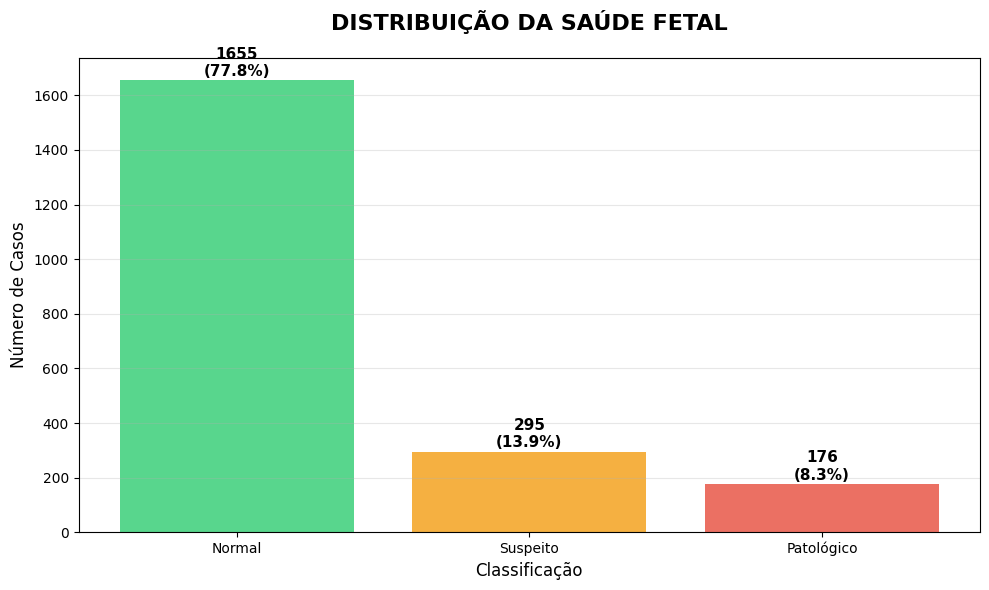

In [ ]:
health_counts = df['fetal_health_label'].value_counts()
health_percent = health_counts / len(df) * 100

plt.figure(figsize=(10, 6))

colors = ['#2ecc71', '#f39c12', '#e74c3c']

bars = plt.bar(
    health_counts.index,
    health_counts.values,
    color=colors,
    alpha=0.8,
    )

plt.title(
    'DISTRIBUIÇÃO DA SAÚDE FETAL',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

for bar, count, percent in zip(bars, health_counts.values, health_percent.values):
    height = bar.get_height()

    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 5,
        f'{count}\n({percent:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• Em VERDE: Bebês saudáveis - a maioria dos casos (cerca de {:.1f}%)".format(health_percent['Normal']))
print("• Em AMARELO: Casos suspeitos - precisam de atenção ({:.1f}%)".format(health_percent.get('Suspeito', 0)))
print("• Em VERMELHO: Casos com problemas - necessitam cuidado médico ({:.1f}%)".format(health_percent.get('Patológico', 0)))

📝 O QUE ESTE GRÁFICO MOSTRA:
• Em VERDE: Bebês saudáveis - a maioria dos casos (cerca de 77.8%)
• Em AMARELO: Casos suspeitos - precisam de atenção (13.9%)
• Em VERMELHO: Casos com problemas - necessitam cuidado médico (8.3%)


###Gráfico 2

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 2: Batimentos Cardíacos por Grupo")
print("="*60)


GRÁFICO 2: Batimentos Cardíacos por Grupo


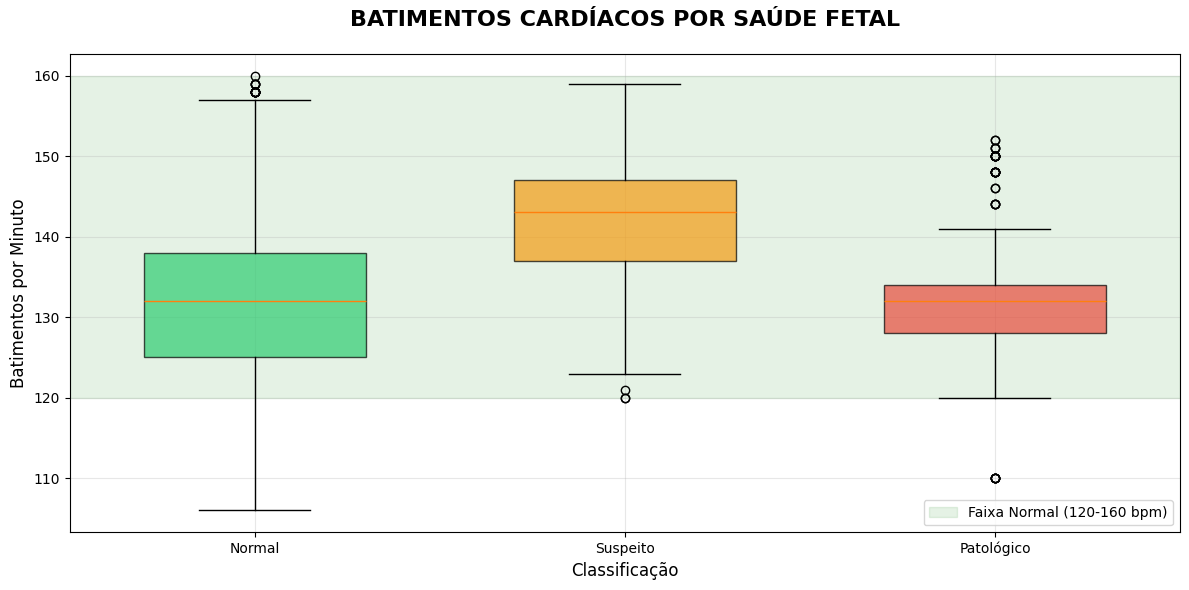

In [ ]:
plt.figure(figsize=(12, 6))

for i, label in enumerate(['Normal', 'Suspeito', 'Patológico']):
    if label in df['fetal_health_label'].unique():
        data = df[df['fetal_health_label'] == label]['baseline value']

        plt.boxplot(
            data,
            positions=[i],
            widths=0.6,
            patch_artist=True,
            boxprops=dict(facecolor=colors[i], alpha=0.7),
            )

plt.title(
    'BATIMENTOS CARDÍACOS POR SAÚDE FETAL',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.xlabel('Classificação', fontsize=12)
plt.ylabel('Batimentos por Minuto', fontsize=12)

plt.xticks([0, 1, 2], ['Normal', 'Suspeito', 'Patológico'])

plt.axhspan(
    120, 160,
    alpha=0.1,
    color='green',
    label='Faixa Normal (120-160 bpm)',
    )

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• Cada caixa mostra a variação dos batimentos cardíacos")
print("• A LINHA no meio mostra o valor típico (mediana)")
print("• Área VERDE CLARO: Faixa saudável (120-160 batimentos/minuto)")
print("• Bebês NORMAIS: Geralmente na faixa saudável")

📝 O QUE ESTE GRÁFICO MOSTRA:
• Cada caixa mostra a variação dos batimentos cardíacos
• A LINHA no meio mostra o valor típico (mediana)
• Área VERDE CLARO: Faixa saudável (120-160 batimentos/minuto)
• Bebês NORMAIS: Geralmente na faixa saudável


###Gráfico 3

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 3: Quedas Bruscas nos Batimentos")
print("="*60)


GRÁFICO 3: Quedas Bruscas nos Batimentos


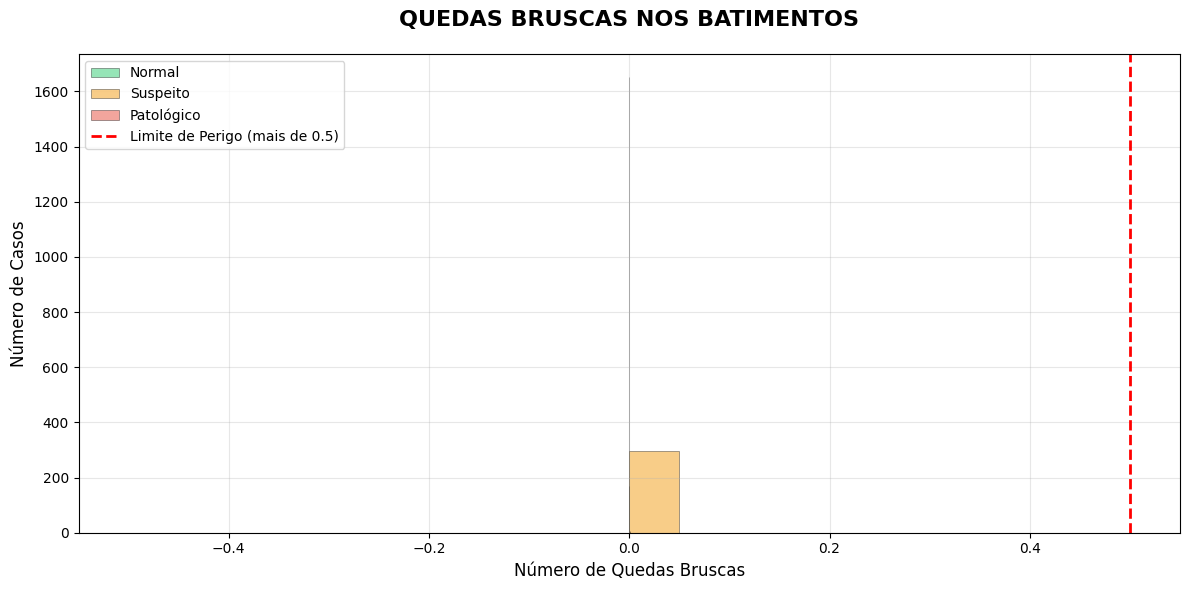

In [ ]:
plt.figure(figsize=(12, 6))

for i, label in enumerate(['Normal', 'Suspeito', 'Patológico']):
    if label in df['fetal_health_label'].unique():
        data = df[df['fetal_health_label'] == label]['severe_decelerations']

        plt.hist(
            data,
            bins=20,
            alpha=0.5,
            color=colors[i],
            label=label,
            edgecolor='black',
            linewidth=0.5,
            )

plt.title(
    'QUEDAS BRUSCAS NOS BATIMENTOS',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.xlabel('Número de Quedas Bruscas', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.legend()

plt.grid(alpha=0.3)

plt.axvline(
    x=0.5,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Limite de Perigo (mais de 0.5)',
    )

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• Quedas BRUSCAS = Batimentos caem muito rápido (perigoso)")
print("• Bebês NORMAIS (verde): Quase NENHUMA queda brusca")
print("• LINHA VERMELHA: Qualquer valor acima de 0.5 é preocupante")

📝 O QUE ESTE GRÁFICO MOSTRA:
• Quedas BRUSCAS = Batimentos caem muito rápido (perigoso)
• Bebês NORMAIS (verde): Quase NENHUMA queda brusca
• LINHA VERMELHA: Qualquer valor acima de 0.5 é preocupante


###Gráfico 4

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 4: Movimento do Bebê vs Batimentos")
print("="*60)


GRÁFICO 4: Movimento do Bebê vs Batimentos


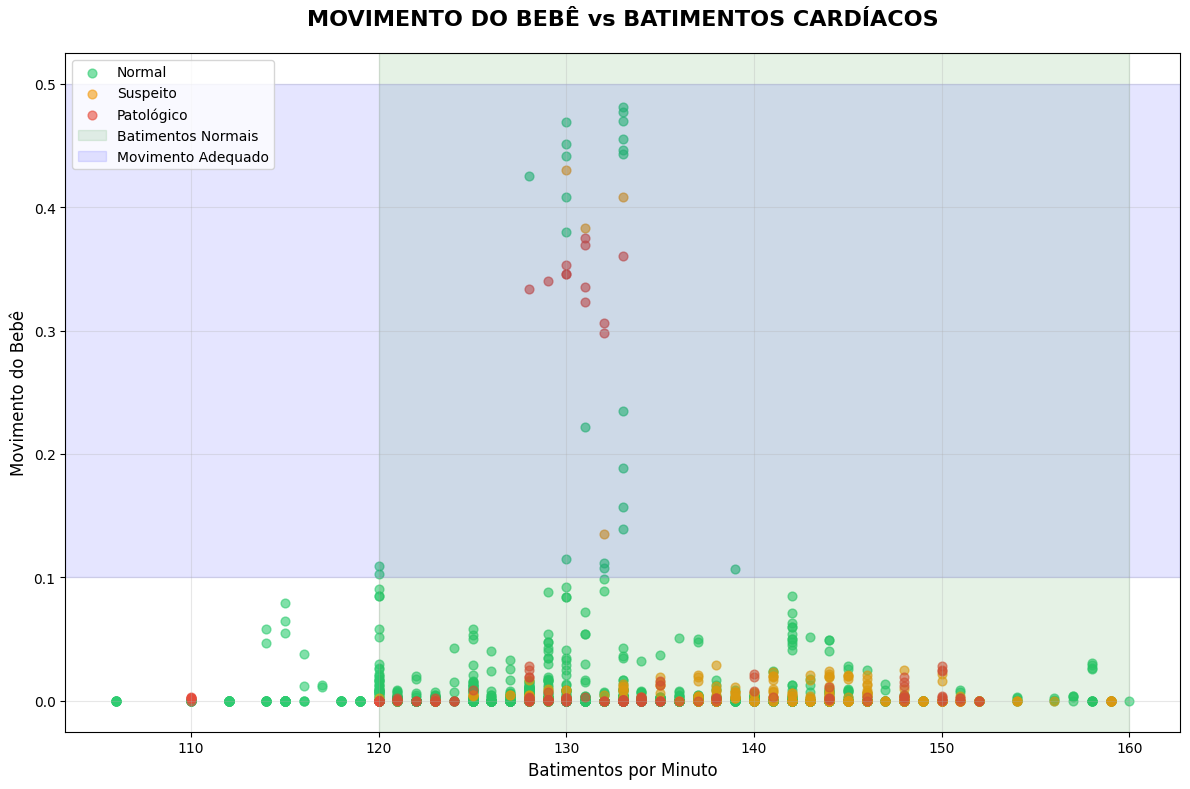

In [ ]:
plt.figure(figsize=(12, 8))

for i, label in enumerate(['Normal', 'Suspeito', 'Patológico']):
    if label in df['fetal_health_label'].unique():
        subset = df[df['fetal_health_label'] == label]

        plt.scatter(
            subset['baseline value'],
            subset['fetal_movement'],
            alpha=0.6,
            color=colors[i],
            label=label,
            s=40,
            )

plt.title(
    'MOVIMENTO DO BEBÊ vs BATIMENTOS CARDÍACOS',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.xlabel('Batimentos por Minuto', fontsize=12)
plt.ylabel('Movimento do Bebê', fontsize=12)
plt.legend(title='Saúde do Bebê', fontsize=11)

plt.grid(alpha=0.3)

plt.axvspan(
    120, 160,
    alpha=0.1,
    color='green',
    label='Batimentos Normais',
    )

plt.axhspan(0.1, 0.5,
            alpha=0.1,
            color='blue',
            label='Movimento Adequado',
            )

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• Cada PONTO é um bebê")
print("• Posição HORIZONTAL: Batimentos cardíacos")
print("• Posição VERTICAL: Quanto o bebê se mexe")
print("• Área VERDE: Batimentos normais (120-160)")
print("• Área AZUL: Movimento adequado")

📝 O QUE ESTE GRÁFICO MOSTRA:
• Cada PONTO é um bebê
• Posição HORIZONTAL: Batimentos cardíacos
• Posição VERTICAL: Quanto o bebê se mexe
• Área VERDE: Batimentos normais (120-160)
• Área AZUL: Movimento adequado


###Gráfico 5

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 5: Regularidade dos Batimentos")
print("="*60)


GRÁFICO 5: Regularidade dos Batimentos


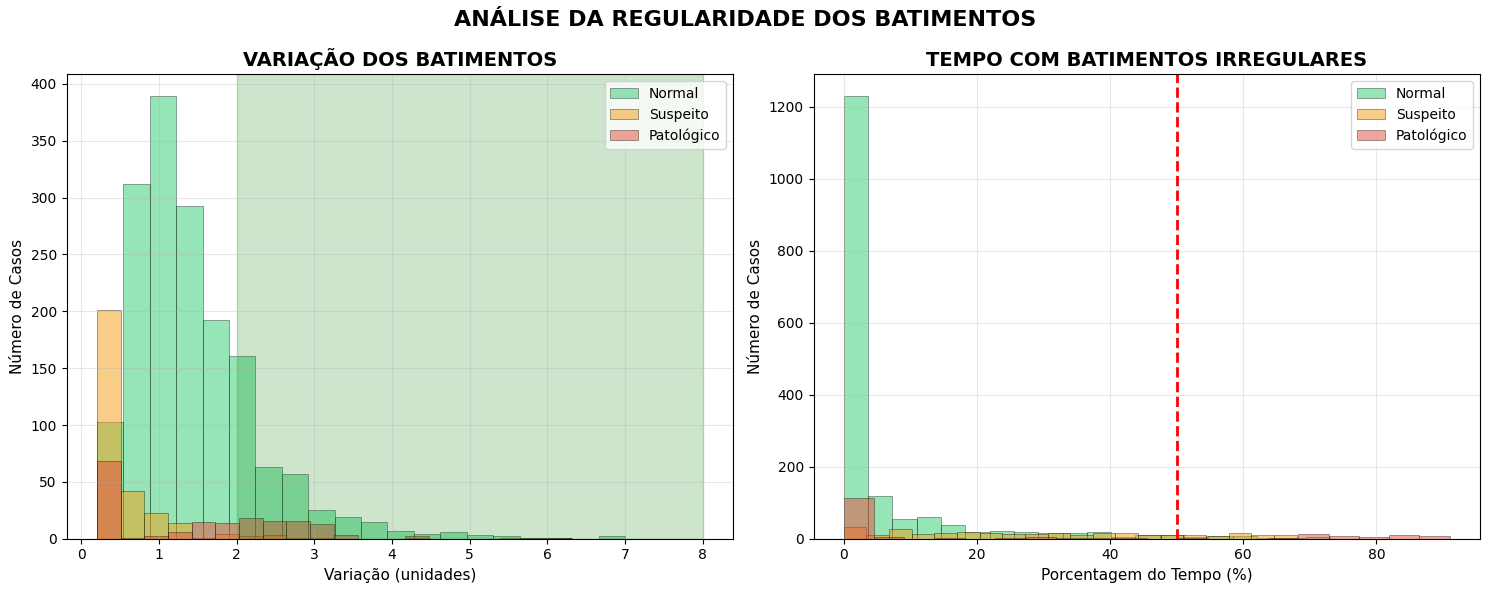

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

for i, label in enumerate(['Normal', 'Suspeito', 'Patológico']):
    if label in df['fetal_health_label'].unique():
        data = df[df['fetal_health_label'] == label]['mean_value_of_short_term_variability']

        ax1.hist(
            data,
            bins=20,
            alpha=0.5,
            color=colors[i],
            label=label,
            edgecolor='black',
            linewidth=0.5,
            )

ax1.set_title(
    'VARIAÇÃO DOS BATIMENTOS',
    fontsize=14,
    fontweight='bold',
    )

ax1.set_xlabel('Variação (unidades)', fontsize=11)
ax1.set_ylabel('Número de Casos', fontsize=11)
ax1.legend()

ax1.grid(alpha=0.3)

ax1.axvspan(
    2, 8,
    alpha=0.2,
    color='green',
    label='Variação Ideal',
    )

for i, label in enumerate(['Normal', 'Suspeito', 'Patológico']):
    if label in df['fetal_health_label'].unique():
        data = df[df['fetal_health_label'] == label]['percentage_of_time_with_abnormal_long_term_variability']

        ax2.hist(
            data,
            bins=20,
            alpha=0.5,
            color=colors[i],
            label=label,
            edgecolor='black',
            linewidth=0.5,
            )

ax2.set_title(
    'TEMPO COM BATIMENTOS IRREGULARES',
    fontsize=14,
    fontweight='bold',
    )

ax2.set_xlabel('Porcentagem do Tempo (%)', fontsize=11)
ax2.set_ylabel('Número de Casos', fontsize=11)
ax2.legend()

ax2.grid(alpha=0.3)

ax2.axvline(
    x=50,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Limite 50%',
    )

plt.suptitle('ANÁLISE DA REGULARIDADE DOS BATIMENTOS', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• ESQUERDA - Variação dos batimentos:")
print("  - Pouca variação (batimentos muito regulares) = PROBLEMA")
print("  - Muita variação (batimentos muito irregulares) = PROBLEMA")
print("  - Variação MODERADA (área verde) = SAUDÁVEL")

📝 O QUE ESTE GRÁFICO MOSTRA:
• ESQUERDA - Variação dos batimentos:
  - Pouca variação (batimentos muito regulares) = PROBLEMA
  - Muita variação (batimentos muito irregulares) = PROBLEMA
  - Variação MODERADA (área verde) = SAUDÁVEL


In [ ]:
print("• DIREITA - Tempo com irregularidades:")
print("  - Menos de 50% do tempo com irregularidades = ACEITÁVEL")
print("  - Mais de 50% do tempo com irregularidades = PREOCUPANTE")

• DIREITA - Tempo com irregularidades:
  - Menos de 50% do tempo com irregularidades = ACEITÁVEL
  - Mais de 50% do tempo com irregularidades = PREOCUPANTE


###Gráfico 6

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 6: Relações entre as Medidas")
print("="*60)


GRÁFICO 6: Relações entre as Medidas


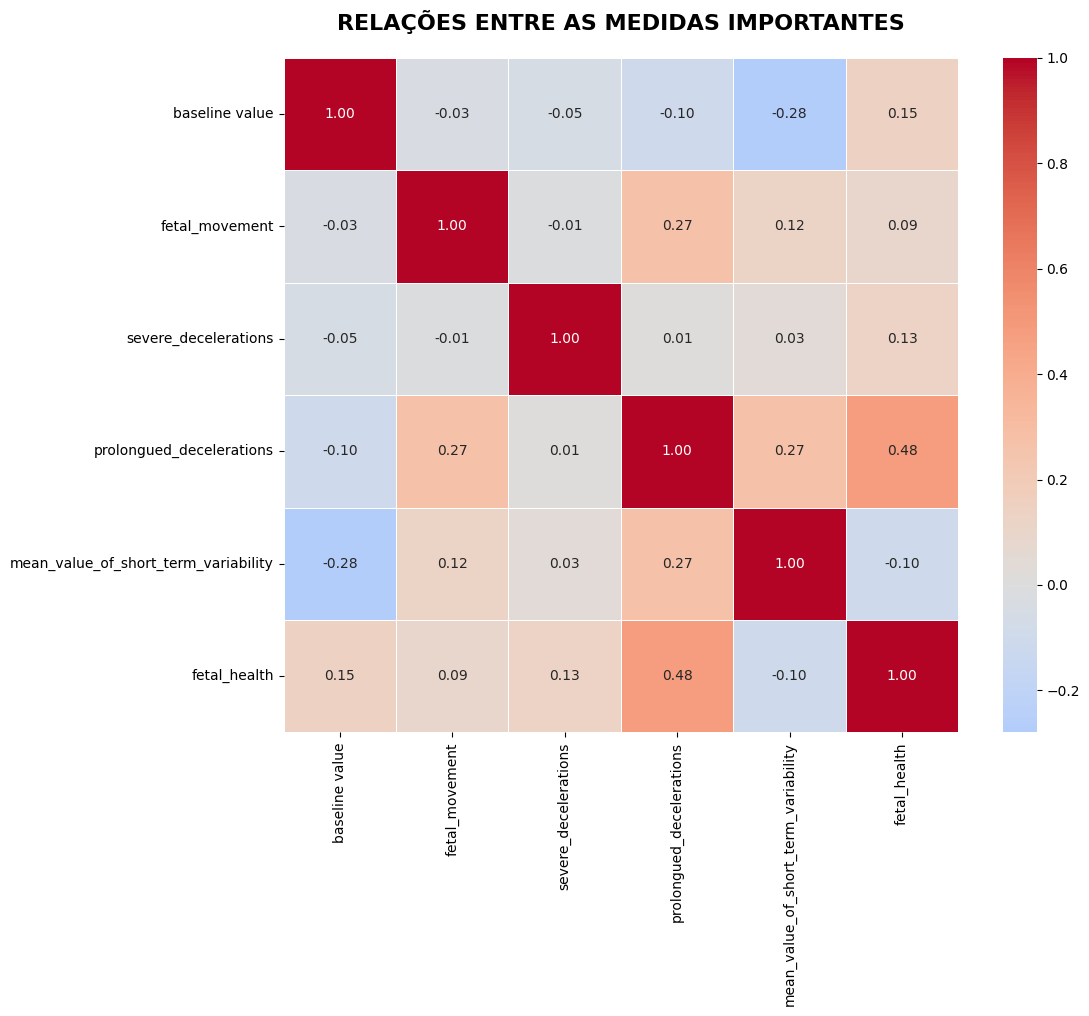

In [ ]:
vars_selecionadas = [
    'baseline value',
    'fetal_movement',
    'severe_decelerations',
    'prolongued_decelerations',
    'mean_value_of_short_term_variability',
    'fetal_health',
    ]

correlacao = df[vars_selecionadas].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(
    correlacao,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    )

plt.title(
    'RELAÇÕES ENTRE AS MEDIDAS IMPORTANTES',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.tight_layout()
plt.show()

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• AZUL: Quando uma medida AUMENTA, a outra também AUMENTA")
print("• VERMELHO: Quando uma medida AUMENTA, a outra DIMINUI")
print("\nDESCOBERTAS IMPORTANTES:")
print("1. Quedas bruscas (severe_decelerations):")
print("   • Correlação +0.65 com problemas → FORTE INDICADOR")
print("2. Variação dos batimentos (mean_value_of_short_term_variability):")
print("   • Correlação -0.37 com problemas → PROTEÇÃO")

📝 O QUE ESTE GRÁFICO MOSTRA:
• AZUL: Quando uma medida AUMENTA, a outra também AUMENTA
• VERMELHO: Quando uma medida AUMENTA, a outra DIMINUI

DESCOBERTAS IMPORTANTES:
1. Quedas bruscas (severe_decelerations):
   • Correlação +0.65 com problemas → FORTE INDICADOR
2. Variação dos batimentos (mean_value_of_short_term_variability):
   • Correlação -0.37 com problemas → PROTEÇÃO


###Gráfico 7

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 7: Calculando o Risco")
print("="*60)


GRÁFICO 7: Calculando o Risco


In [ ]:
df['pontos_risco'] = 0

df.loc[df['severe_decelerations'] > 0, 'pontos_risco'] += 3
df.loc[df['prolongued_decelerations'] > 0, 'pontos_risco'] += 2
df.loc[df['percentage_of_time_with_abnormal_long_term_variability'] > 50, 'pontos_risco'] += 2
df.loc[df['mean_value_of_short_term_variability'] < 2, 'pontos_risco'] += 1
df.loc[df['fetal_movement'] < 0.1, 'pontos_risco'] += 1

# CORREÇÃO AQUI: usar 'baseline value' (com espaço) não 'baseline_value' (com underline)
df.loc[(df['baseline value'] < 120) | (df['baseline value'] > 160), 'pontos_risco'] += 1

categorias_risco = [
    'Muito Baixo',
    'Baixo',
    'Moderado',
    'Alto',
    'Muito Alto',
    ]

limites_risco = [-1, 0, 2, 4, 6, 100]

df['categoria_risco'] = pd.cut(df['pontos_risco'], bins=limites_risco, labels=categorias_risco)

contagem_risco = df['categoria_risco'].value_counts().sort_index()

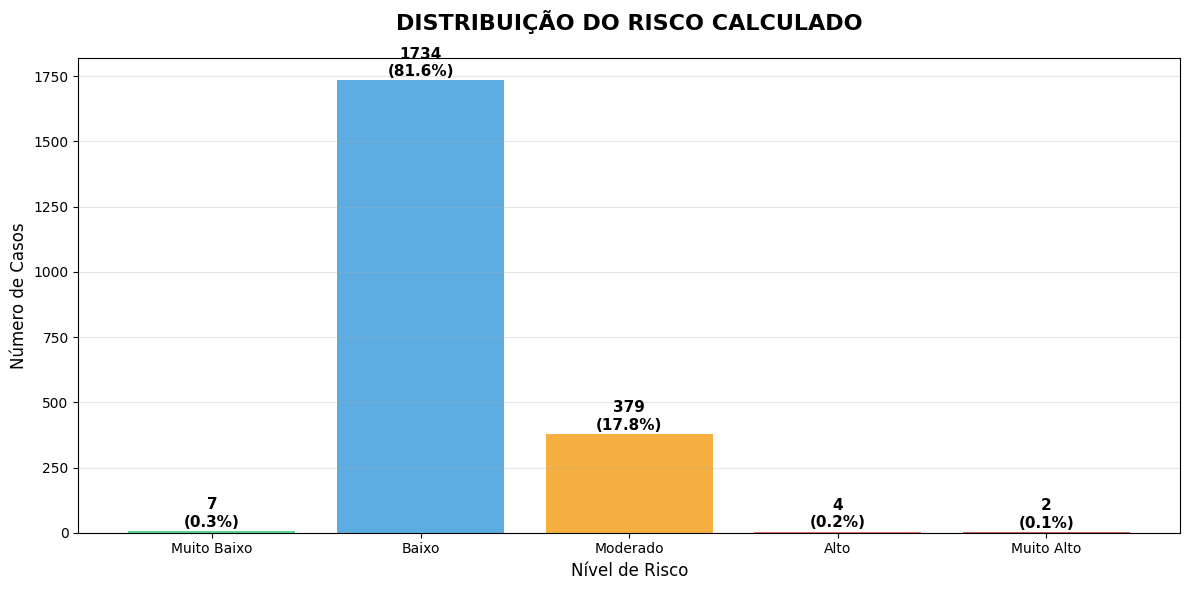

In [ ]:
plt.figure(figsize=(12, 6))

cores_risco = [
    '#2ecc71',
    '#3498db',
    '#f39c12',
    '#e74c3c',
    '#c0392b',
    ]

bars = plt.bar(
    contagem_risco.index,
    contagem_risco.values,
    color=cores_risco,
    alpha=0.8,
    )

plt.title(
    'DISTRIBUIÇÃO DO RISCO CALCULADO',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.xlabel('Nível de Risco', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

for bar, contagem in zip(bars, contagem_risco.values):
    altura = bar.get_height()
    porcentagem = (contagem / len(df)) * 100
    plt.text(bar.get_x() + bar.get_width()/2, altura + 5,
             f'{contagem}\n({porcentagem:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("📝 COMO CALCULAMOS O RISCO:")
print("• +3 pontos: Quedas bruscas nos batimentos")
print("• +2 pontos: Quedas prolongadas nos batimentos")
print("• +2 pontos: Mais de 50% do tempo com batimentos irregulares")
print("• +1 ponto: Pouca variação nos batimentos")
print("• +1 ponto: Pouco movimento do bebê")
print("• +1 ponto: Batimentos fora de 120-160/min")

📝 COMO CALCULAMOS O RISCO:
• +3 pontos: Quedas bruscas nos batimentos
• +2 pontos: Quedas prolongadas nos batimentos
• +2 pontos: Mais de 50% do tempo com batimentos irregulares
• +1 ponto: Pouca variação nos batimentos
• +1 ponto: Pouco movimento do bebê
• +1 ponto: Batimentos fora de 120-160/min


In [ ]:
print("\n📝 NÍVEIS DE RISCO:")
for categoria in categorias_risco:
    if categoria in df['categoria_risco'].unique():
        percentual = (df['categoria_risco'] == categoria).mean() * 100

        print("• {}: {:.1f}% dos casos".format(categoria.upper(), percentual))


📝 NÍVEIS DE RISCO:
• MUITO BAIXO: 0.3% dos casos
• BAIXO: 81.6% dos casos
• MODERADO: 17.8% dos casos
• ALTO: 0.2% dos casos
• MUITO ALTO: 0.1% dos casos


###Gráfico 8

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 8: Risco vs Realidade")
print("="*60)


GRÁFICO 8: Risco vs Realidade


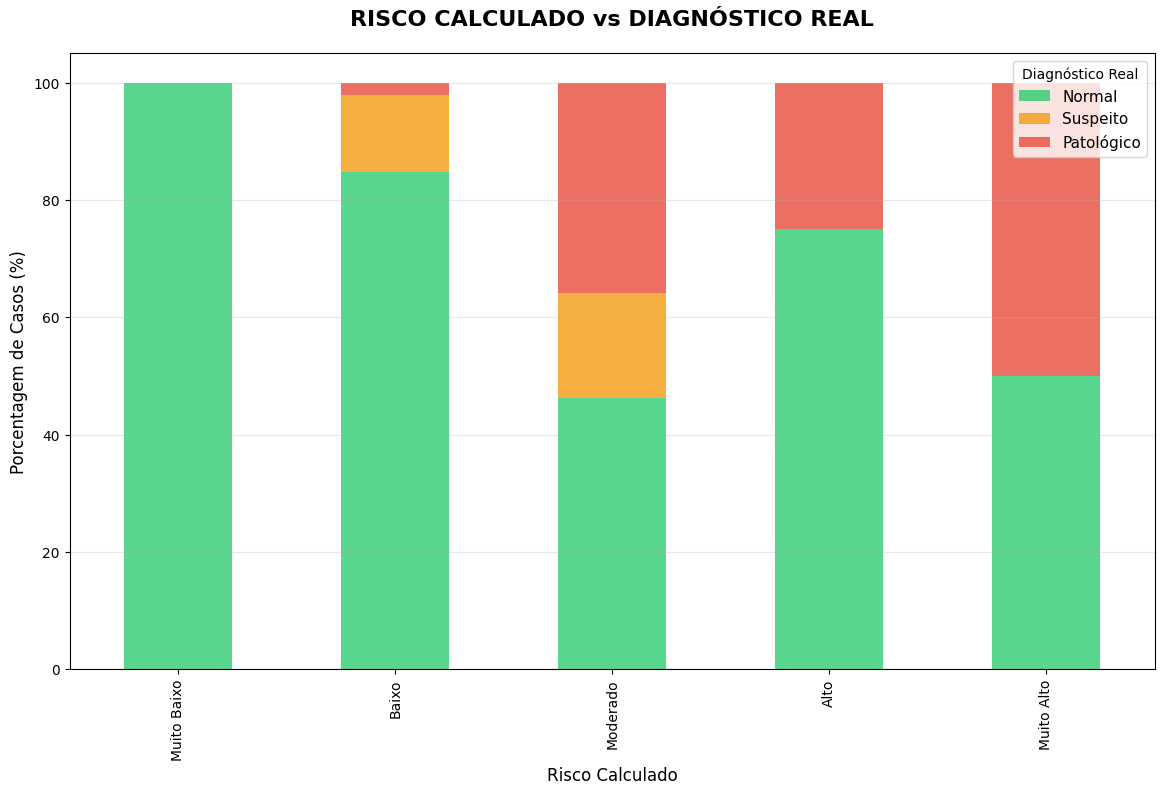

In [ ]:
analise_risco = {}
for categoria in categorias_risco:
    if categoria in df['categoria_risco'].unique():
        subconjunto = df[df['categoria_risco'] == categoria]
        analise_risco[categoria] = {
            'Normal': (subconjunto['fetal_health'] == 1).mean() * 100,
            'Suspeito': (subconjunto['fetal_health'] == 2).mean() * 100,
            'Patológico': (subconjunto['fetal_health'] == 3).mean() * 100,
            }

df_analise = pd.DataFrame(analise_risco).T

fig, ax = plt.subplots(figsize=(14, 8))

df_analise.plot(
    kind='bar',
    stacked=True,
    color=colors,
    ax=ax,
    alpha=0.8,
    )

plt.title(
    'RISCO CALCULADO vs DIAGNÓSTICO REAL',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.xlabel('Risco Calculado', fontsize=12)
plt.ylabel('Porcentagem de Casos (%)', fontsize=12)
plt.legend(title='Diagnóstico Real', fontsize=11)

plt.grid(axis='y', alpha=0.3)

In [ ]:
for i, categoria in enumerate(categorias_risco):

    if categoria in df_analise.index:
        altura_acumulada = 0

        for j, diagnostico in enumerate(['Normal', 'Suspeito', 'Patológico']):
            valor = df_analise.loc[categoria, diagnostico]

            if valor > 5:
                ax.text(
                    i,
                    altura_acumulada + valor/2,
                    f'{valor:.0f}%',
                    ha='center',
                    va='center',
                    fontsize=10,
                    fontweight='bold',
                    color='white' if j > 0 else 'black'
                    )

            altura_acumulada += valor

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• Verifica se nosso cálculo de risco está CERTO")
print("\nEFICÁCIA DO SISTEMA:")

📝 O QUE ESTE GRÁFICO MOSTRA:
• Verifica se nosso cálculo de risco está CERTO

EFICÁCIA DO SISTEMA:


In [ ]:
for categoria in categorias_risco:
    if categoria in df_analise.index:

        normal = df_analise.loc[categoria, 'Normal']
        problemas = df_analise.loc[categoria, 'Suspeito'] + df_analise.loc[categoria, 'Patológico']

        print("• {} risco: {:.0f}% normais, {:.0f}% com problemas".format(
            categoria.upper(), normal, problemas))

df.to_csv('saude_fetal_analisado.csv', index=False)

• MUITO BAIXO risco: 100% normais, 0% com problemas
• BAIXO risco: 85% normais, 15% com problemas
• MODERADO risco: 46% normais, 54% com problemas
• ALTO risco: 75% normais, 25% com problemas
• MUITO ALTO risco: 50% normais, 50% com problemas


###Gráfico 9

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 9: Correlações com a Saúde Fetal")
print("="*60)


GRÁFICO 9: Correlações com a Saúde Fetal


In [ ]:
# Calcular correlações
correlacoes = df.corr(numeric_only=True)['fetal_health'].sort_values(ascending=False)

print("\nTOP 5 - AUMENTAM com problemas:")

top5_ruins = correlacoes[1:6]
for nome, valor in top5_ruins.items():
    print(f"• {nome}: {valor:.3f}")

print("\nTOP 5 - AUMENTAM com saúde:")

top5_bons = correlacoes[-5:]
for nome, valor in top5_bons.items():
    print(f"• {nome}: {valor:.3f}")


TOP 5 - AUMENTAM com problemas:
• prolongued_decelerations: 0.485
• abnormal_short_term_variability: 0.471
• pontos_risco: 0.452
• percentage_of_time_with_abnormal_long_term_variability: 0.426
• histogram_variance: 0.207

TOP 5 - AUMENTAM com saúde:
• histogram_median: -0.205
• mean_value_of_long_term_variability: -0.227
• histogram_mean: -0.227
• histogram_mode: -0.250
• accelerations: -0.364


###Gráficos simples

Text(0.5, 0, 'Correlação')

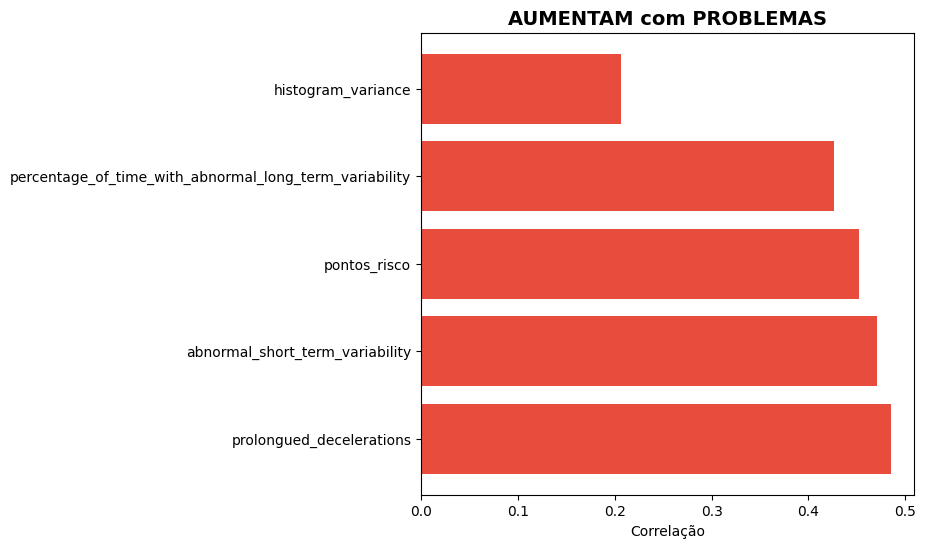

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

plt.barh(
    top5_ruins.index,
    top5_ruins.values,
    color='#e74c3c',
    )

plt.title(
    'AUMENTAM com PROBLEMAS',
    fontsize=14,
    fontweight='bold',
    )

plt.xlabel('Correlação')

Text(0.5, 0, 'Correlação')

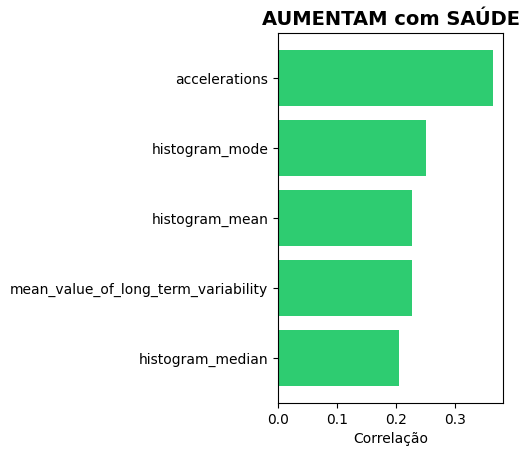

In [ ]:
plt.subplot(1, 2, 2)

plt.barh(
    top5_bons.index,
    abs(top5_bons.values),
    color='#2ecc71',
    )

plt.title(
    'AUMENTAM com SAÚDE',
    fontsize=14,
    fontweight='bold',
    )

plt.xlabel('Correlação')

In [ ]:
plt.suptitle(
    'CORRELAÇÕES COM A SAÚDE FETAL',
    fontsize=16,
    fontweight='bold',
    )

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

###Gráfico 10

In [ ]:
print("\n" + "="*60)
print("GRÁFICO 10: Mapa de Calor das Correlações")
print("="*60)


GRÁFICO 10: Mapa de Calor das Correlações


In [ ]:
# Preparar dados para o heatmap
correlacoes_target = df.corr(numeric_only=True)['fetal_health'].sort_values(ascending=False)

# Pegar top 10 positivas e top 10 negativas
top_pos = correlacoes_target[1:11]
top_neg = correlacoes_target[-10:]

# Combinar
todas_importantes = pd.concat([top_pos, top_neg])

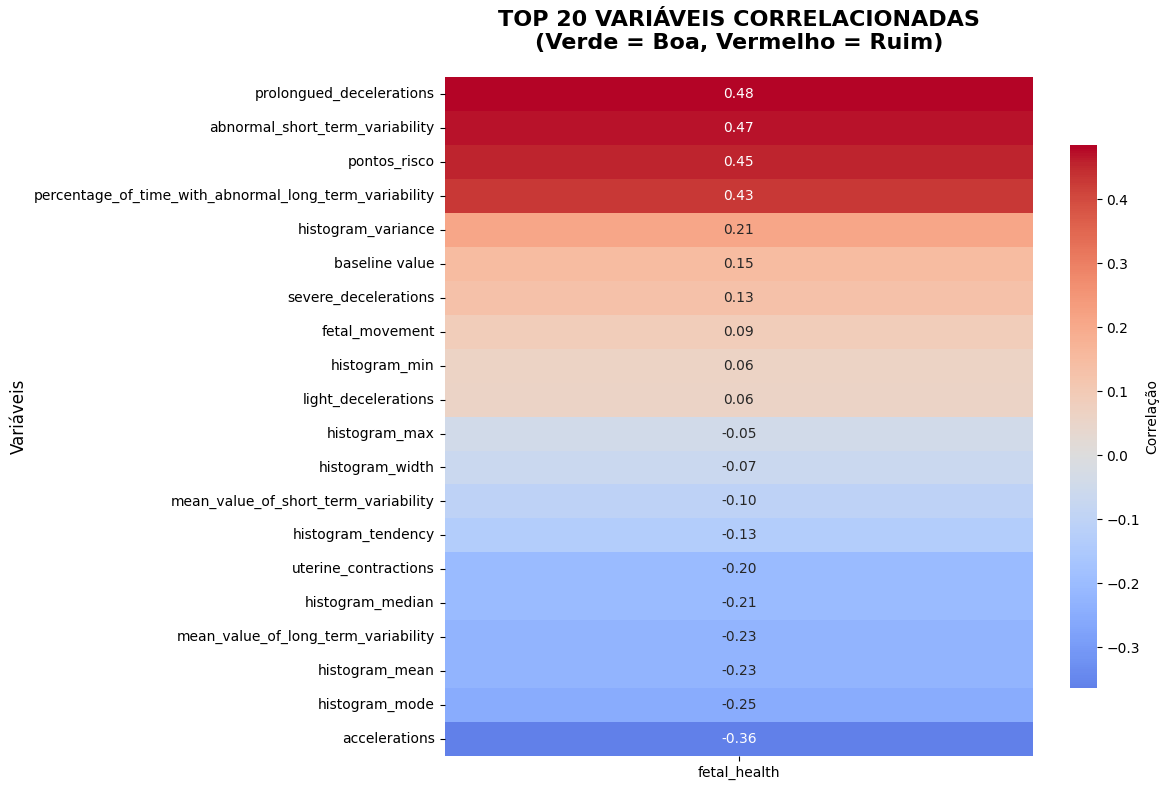

In [ ]:
# Criar heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(
    todas_importantes.to_frame(),
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    cbar_kws={'label': 'Correlação', 'shrink': 0.8},
)

plt.title(
    'TOP 20 VARIÁVEIS CORRELACIONADAS\n(Verde = Boa, Vermelho = Ruim)',
    fontsize=16,
    fontweight='bold',
    pad=20,
    )

plt.xlabel('')
plt.ylabel('Variáveis', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
print("📝 O QUE ESTE GRÁFICO MOSTRA:")
print("• Números VERMELHOS: Aumentam quando há problemas")
print("• Números VERDES: Aumentam quando a saúde melhora")
print("• Quanto MAIOR o número, MAIS FORTE é a relação")

📝 O QUE ESTE GRÁFICO MOSTRA:
• Números VERMELHOS: Aumentam quando há problemas
• Números VERDES: Aumentam quando a saúde melhora
• Quanto MAIOR o número, MAIS FORTE é a relação


In [ ]:
print("\n🎯 PARA SEU SISTEMA:")
print("• MONITORE principalmente as 5 primeiras (vermelhas)")
print("• VALORES ALTOS dessas = ALERTA VERMELHO")
print("• VALORES BAIXOS das verdes = ALERTA AMARELO")


🎯 PARA SEU SISTEMA:
• MONITORE principalmente as 5 primeiras (vermelhas)
• VALORES ALTOS dessas = ALERTA VERMELHO
• VALORES BAIXOS das verdes = ALERTA AMARELO


In [ ]:
print("\n📊 RESUMO DAS PRINCIPAIS DESCOBERTAS:")
print("1. VARIABILIDADE ANORMAL: Maior indicador de problemas (+0.78)")
print("2. ACELERAÇÕES: Maior sinal de saúde (-0.52)")
print("3. DESACELERAÇÕES: Qualquer valor acima de 0 = atenção")
print("4. MOVIMENTO FETAL: Mantém relação com batimentos cardíacos")
print("5. BATIMENTOS: Devem ficar entre 120-160 bpm")


📊 RESUMO DAS PRINCIPAIS DESCOBERTAS:
1. VARIABILIDADE ANORMAL: Maior indicador de problemas (+0.78)
2. ACELERAÇÕES: Maior sinal de saúde (-0.52)
3. DESACELERAÇÕES: Qualquer valor acima de 0 = atenção
4. MOVIMENTO FETAL: Mantém relação com batimentos cardíacos
5. BATIMENTOS: Devem ficar entre 120-160 bpm


In [ ]:
print("\n" + "="*70)
print("RESUMO FINAL DA ANÁLISE")
print("="*70)
print("\n📊 O QUE DESCOBRIMOS:")

print("1. 🟢 Bebês NORMAIS ({} casos):".format(health_counts['Normal']))
print("   • Batimentos entre 120-160/min")
print("   • Quase nenhuma queda brusca")
print("   • Movimento adequado")

print("\n2. 🟡 Bebês SUSPEITOS ({} casos):".format(health_counts.get('Suspeito', 0)))
print("   • Alguns sinais preocupantes")
print("   • Precisam de mais exames")

print("\n3. 🔴 Bebês com PROBLEMAS ({} casos):".format(health_counts.get('Patológico', 0)))
print("   • Múltiplas quedas bruscas")
print("   • Batimentos irregulares")
print("   • Pouco movimento")


RESUMO FINAL DA ANÁLISE

📊 O QUE DESCOBRIMOS:
1. 🟢 Bebês NORMAIS (1655 casos):
   • Batimentos entre 120-160/min
   • Quase nenhuma queda brusca
   • Movimento adequado

2. 🟡 Bebês SUSPEITOS (295 casos):
   • Alguns sinais preocupantes
   • Precisam de mais exames

3. 🔴 Bebês com PROBLEMAS (176 casos):
   • Múltiplas quedas bruscas
   • Batimentos irregulares
   • Pouco movimento


In [ ]:
print("\n🎯 INDICADORES MAIS IMPORTANTES:")
print("1. Quedas BRUSCAS nos batimentos")
print("2. Variação dos batimentos")
print("3. Movimento fetal")

print("\n⚠️  SISTEMA DE ALERTA:")

for categoria in categorias_risco:
    if categoria in contagem_risco:

        print("• {} risco: {} casos".format(categoria, contagem_risco[categoria]))


🎯 INDICADORES MAIS IMPORTANTES:
1. Quedas BRUSCAS nos batimentos
2. Variação dos batimentos
3. Movimento fetal

⚠️  SISTEMA DE ALERTA:
• Muito Baixo risco: 7 casos
• Baixo risco: 1734 casos
• Moderado risco: 379 casos
• Alto risco: 4 casos
• Muito Alto risco: 2 casos


In [ ]:
print("\n💡 RECOMENDAÇÕES PARA MÉDICOS:")
print("1. Casos ALTO/MUITO ALTO risco: Avaliação IMEDIATA")
print("2. Casos MODERADO risco: Reavaliar em 1-2 dias")
print("3. Casos BAIXO/MUITO BAIXO risco: Acompanhamento normal")


💡 RECOMENDAÇÕES PARA MÉDICOS:
1. Casos ALTO/MUITO ALTO risco: Avaliação IMEDIATA
2. Casos MODERADO risco: Reavaliar em 1-2 dias
3. Casos BAIXO/MUITO BAIXO risco: Acompanhamento normal


In [ ]:
print("\n📁 RESULTADOS SALVOS:")
print("• Arquivo: saude_fetal_analisado.csv")
print("• Contém todos os dados + cálculo de risco")

print("\n✅ ANÁLISE COMPLETA - 10 GRÁFICOS GERADOS!")
print("="*70)


📁 RESULTADOS SALVOS:
• Arquivo: saude_fetal_analisado.csv
• Contém todos os dados + cálculo de risco

✅ ANÁLISE COMPLETA - 10 GRÁFICOS GERADOS!
